In [1]:
suppressMessages(library(ArchR))
suppressMessages(library(Seurat))
suppressMessages(library(Signac))
suppressMessages(library(harmony))
suppressMessages(library(dplyr))
suppressMessages(library(cowplot))
suppressMessages(library(harmony))
suppressMessages(library(Nebulosa))
suppressMessages(library(ggpubr))
suppressMessages(library(Ipaper))
suppressMessages(library(phateR))
suppressMessages(library(viridis))
suppressMessages(library(SeuratDisk))
suppressMessages(library(SingleCellExperiment))
suppressMessages(library(destiny))
suppressMessages(library(plotly))

In [2]:
set.seed(42)
getwd()

[1] "/data/scATA/SingleCellOpenChromatin/local/VisiumHeartRevision/IntegrativeAnalysis/Cardiomyocyte/code"

In [3]:
coembed <- readRDS("../data/coembed/coembed.annotation.Rds")

In [4]:
coembed

An object of class Seurat 
230075 features across 59045 samples within 3 assays 
Active assay: RNA (28933 features, 2000 variable features)
 2 other assays present: peaks, GeneActivity
 5 dimensional reductions calculated: pca, umap, harmony, umap_harmony, umap_harmony_v2

In [5]:
unique(coembed$annotation)

[1] healthy_CM      vCM_4           vCM_3           intermediate_CM
[5] damaged_CM     
Levels: healthy_CM intermediate_CM damaged_CM vCM_3 vCM_4

In [6]:
## only include Myofib, SCARA5+ and Fib_0, as they are also recovered by mouse data
df <- coembed@meta.data %>%
    as.data.frame() %>%
    subset(., annotation %in% c("healthy_CM", "intermediate_CM", "damaged_CM"))

coembed <- coembed[, rownames(df)]

In [7]:
coembed

An object of class Seurat 
230075 features across 55204 samples within 3 assays 
Active assay: RNA (28933 features, 2000 variable features)
 2 other assays present: peaks, GeneActivity
 5 dimensional reductions calculated: pca, umap, harmony, umap_harmony, umap_harmony_v2

In [8]:
cols <- ArchR::paletteDiscrete(unique(coembed@meta.data[, "annotation"]))
cols

healthy_CM intermediate_CM      damaged_CM 
      "#D51F26"       "#272E6A"       "#208A42"

In [9]:
source("../../utils/trajectory_ArchR.R")

traj1 <- c("healthy_CM", "intermediate_CM", "damaged_CM")
traj2 <- c("healthy_CM", "damaged_CM")

In [10]:
## umap
coembed <- RunUMAP(coembed, 
               dims = 1:50, 
               reduction = 'harmony',
               reduction.name = "umap_harmony_v2",
               reduction.ke = 'umap_harmony_v2_',
              verbose = FALSE,
                    min.dist = 0.4)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from umap_harmony_v2_ to umapharmonyv2_”
Warning message:
“All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to umapharmonyv2_”


In [11]:
# coembed <- addTrajectoryA(coembed, reducedDims = "umap_harmony_v2", 
#                           name="healthy_intermediate_damged_umap", trajectory = traj1,
#                          groupBy = "annotation",
#                             useAll = FALSE)

# coembed <- addTrajectoryA(coembed, reducedDims = "umap_harmony_v2", 
#                           name="healthy_damged_umap", trajectory = traj2,
#                          groupBy = "annotation",
#                             useAll = FALSE)

# p1 <- DimPlot(coembed, reduction = "umap_harmony_v2", cols = cols) +
#     xlab("UMAP1") + ylab("UMAP2") +
#     theme(axis.ticks = element_blank(),
#          axis.text = element_blank())


# p2 <- plotTrajectoryA(coembed, trajectory = "healthy_intermediate_damged_umap", 
#                       name = "healthy_intermediate_damged_umap",
#                       embedding = "umap_harmony_v2", size = 1, plotAs = "points",
#                      addArrow = FALSE) +
#    xlab("UMAP 1") + ylab("UMAP 2") +
#    theme_cowplot() + ggtitle("healthy_intermediate_damged_umap")


# p3 <- plotTrajectoryA(coembed, trajectory = "healthy_damged_umap", 
#                       name = "healthy_damged_umap",
#                       embedding = "umap_harmony_v2", size = 1, plotAs = "points",
#                      addArrow = FALSE) +
#    xlab("UMAP 1") + ylab("UMAP 2") +
#    theme_cowplot() + ggtitle("healthy_damged_umap")

# options(repr.plot.height = 5, repr.plot.width = 15)

# p1 + p2 + p3

In [12]:
# df1 <- coembed@meta.data %>%
#     as.data.frame() %>%
#     subset(., !is.na(healthy_intermediate_damged_umap)) %>%
#     group_by(patient_group) %>%
#     mutate(time_point = cut(healthy_intermediate_damged_umap, 
#                             breaks = seq(0, 100, 5), 
#                             labels = seq(1, 20, 1))) %>%
#     ungroup() %>%
#     group_by(patient_group, time_point) %>%
#     summarise(num_cells = n()) %>%
#     mutate(cell_proportion = num_cells / sum(num_cells))

# df2 <- coembed@meta.data %>%
#     as.data.frame() %>%
#     subset(., !is.na(healthy_damged_umap)) %>%
#     group_by(patient_group) %>%
#     mutate(time_point = cut(healthy_damged_umap, 
#                             breaks = seq(0, 100, 5), 
#                             labels = seq(1, 20, 1))) %>%
#     ungroup() %>%
#     group_by(patient_group, time_point) %>%
#     summarise(num_cells = n()) %>%
#     mutate(cell_proportion = num_cells / sum(num_cells))

# df1$time_point <- 5*as.numeric(df1$time_point)
# df2$time_point <- 5*as.numeric(df2$time_point)

# p1 <- ggplot(data = df1, aes(x = time_point, y = cell_proportion,
#                                 color = patient_group)) +
#         geom_smooth(se = FALSE) + ggtitle("healthy_intermediate_damged_umap") +
#     xlab("Pseudo-time") + ylab("Cell proportion") +
#     theme_cowplot() +
#         theme(legend.title = element_blank())

# p2 <- ggplot(data = df2, aes(x = time_point, y = cell_proportion,
#                                 color = patient_group)) +
#         geom_smooth(se = FALSE) + ggtitle("healthy_damged_umap") +
#     xlab("Pseudo-time") + ylab("Cell proportion") +
#     theme_cowplot() +
#         theme(legend.title = element_blank())

# options(repr.plot.height = 4, repr.plot.width = 12)
# p1 + p2

In [13]:
## duffusion map
matDR <- coembed@reductions$umap_harmony_v2@cell.embeddings

dm <- DiffusionMap(as.matrix(matDR),
                   verbose = TRUE)

finding knns......done. Time: 20.94s
Calculating transition probabilities......done. Time: 0.33s

performing eigen decomposition......done. Time: 69.60s


In [14]:
embedding <- as.data.frame(dm)[, c("DC1", "DC2")]
colnames(embedding) <- paste0("DC_", 1:ncol(embedding))

coembed[['dm']] <- CreateDimReducObject(embeddings = as.matrix(embedding), 
                                              key = "DC")

Warning message:
“No assay specified, setting assay as RNA by default.”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from DC to DC_”
Warning message:
“All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to DC_”


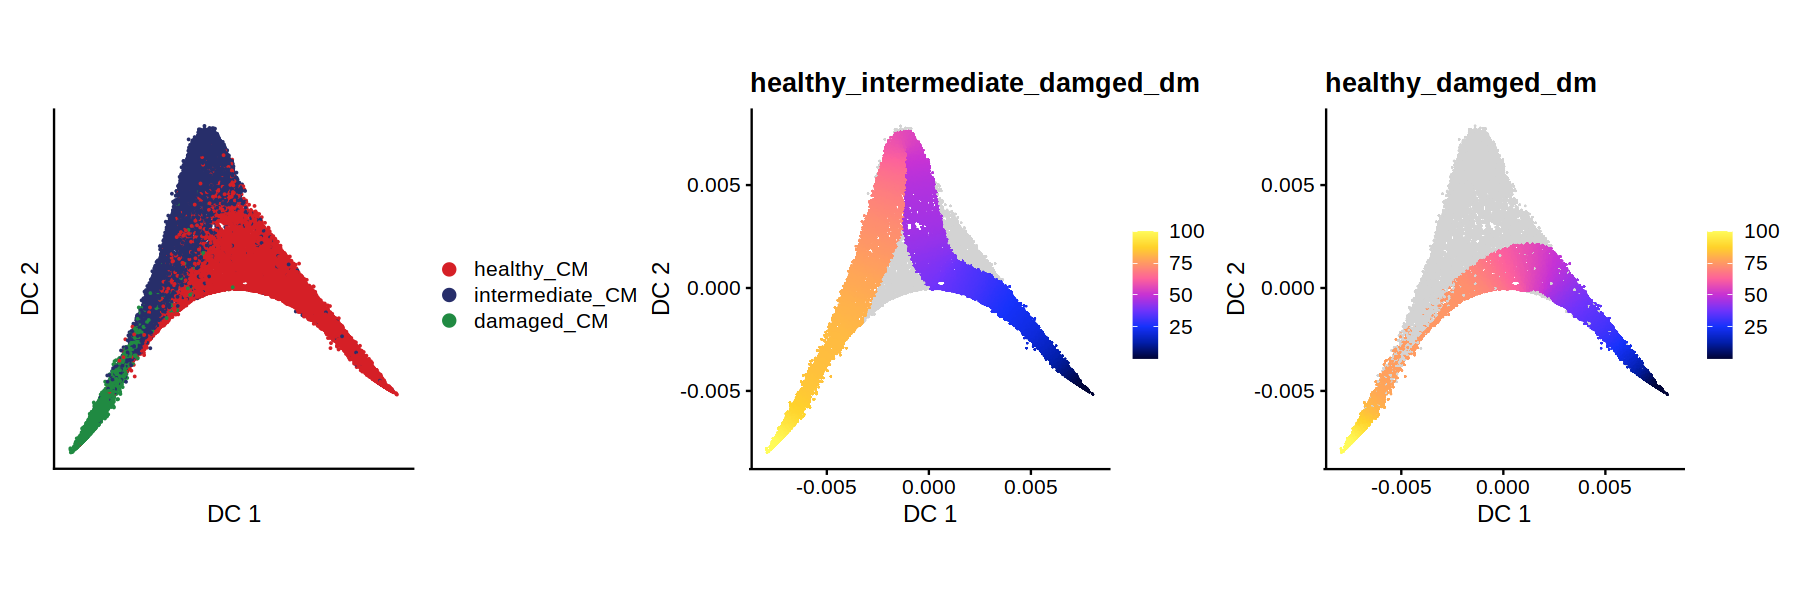

In [15]:
coembed <- addTrajectoryA(coembed, reducedDims = "dm", 
                          name="healthy_intermediate_damaged", trajectory = traj1,
                         groupBy = "annotation", 
                            useAll = FALSE)

coembed <- addTrajectoryA(coembed, reducedDims = "dm", 
                          name="healthy_damaged", trajectory = traj2,
                         groupBy = "annotation", 
                            useAll = FALSE)


p1 <- DimPlot(coembed, reduction = "dm", cols = cols) +
    xlab("DC 1") + ylab("DC 2") +
    theme(axis.ticks = element_blank(),
         axis.text = element_blank())


p2 <- plotTrajectoryA(coembed, trajectory = "healthy_intermediate_damaged", 
                      name = "healthy_intermediate_damaged",
                      embedding = "dm", size = 1, plotAs = "points",
                     addArrow = FALSE) +
   xlab("DC 1") + ylab("DC 2") +
   theme_cowplot() + ggtitle("healthy_intermediate_damaged")


p3 <- plotTrajectoryA(coembed, trajectory = "healthy_damaged", 
                      name = "healthy_damaged",
                      embedding = "dm", size = 1, plotAs = "points",
                     addArrow = FALSE) +
   xlab("DC 1") + ylab("DC 2") +
   theme_cowplot() + ggtitle("healthy_damaged")

options(repr.plot.height = 5, repr.plot.width = 15)

p1 + p2 + p3

`summarise()` has grouped output by 'patient_group'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'patient_group'. You can override using the `.groups` argument.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



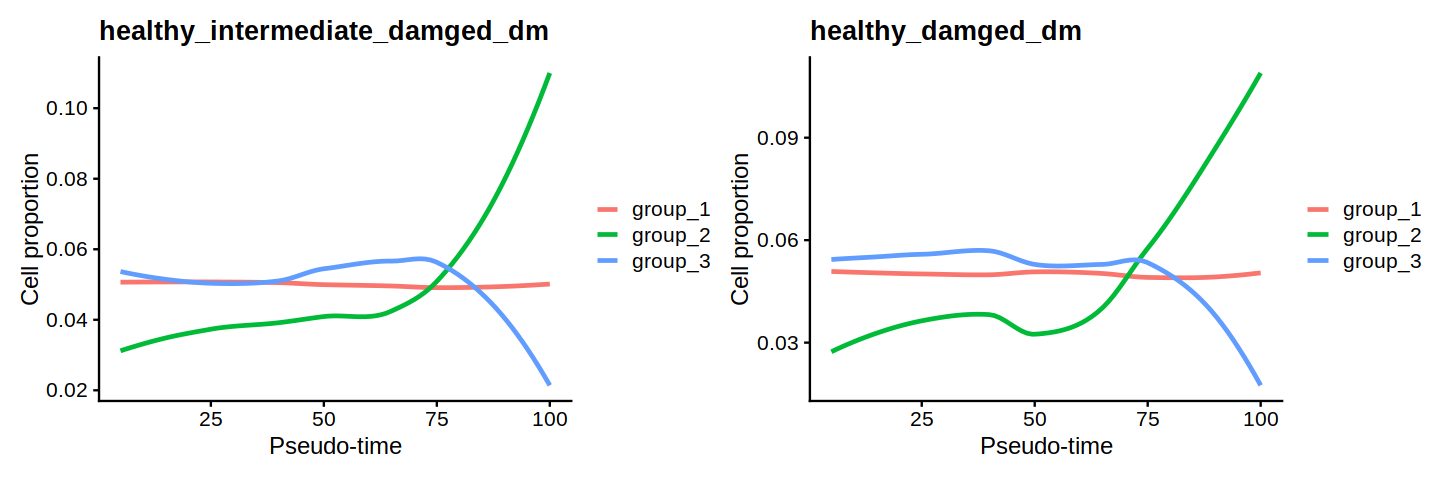

In [16]:
df1 <- coembed@meta.data %>%
    as.data.frame() %>%
    subset(., !is.na(healthy_intermediate_damaged)) %>%
    group_by(patient_group) %>%
    mutate(time_point = cut(healthy_intermediate_damaged, 
                            breaks = seq(0, 100, 5), 
                            labels = seq(1, 20, 1))) %>%
    ungroup() %>%
    group_by(patient_group, time_point) %>%
    summarise(num_cells = n()) %>%
    mutate(cell_proportion = num_cells / sum(num_cells))

df2 <- coembed@meta.data %>%
    as.data.frame() %>%
    subset(., !is.na(healthy_damaged)) %>%
    group_by(patient_group) %>%
    mutate(time_point = cut(healthy_damaged, 
                            breaks = seq(0, 100, 5), 
                            labels = seq(1, 20, 1))) %>%
    ungroup() %>%
    group_by(patient_group, time_point) %>%
    summarise(num_cells = n()) %>%
    mutate(cell_proportion = num_cells / sum(num_cells))


df1$time_point <- 5*as.numeric(df1$time_point)
df2$time_point <- 5*as.numeric(df2$time_point)

p1 <- ggplot(data = df1, aes(x = time_point, y = cell_proportion,
                                color = patient_group)) +
        geom_smooth(se = FALSE) + ggtitle("healthy_intermediate_damaged") +
    xlab("Pseudo-time") + ylab("Cell proportion") +
    theme_cowplot() +
        theme(legend.title = element_blank())

p2 <- ggplot(data = df2, aes(x = time_point, y = cell_proportion,
                                color = patient_group)) +
        geom_smooth(se = FALSE) + ggtitle("healthy_damaged") +
    xlab("Pseudo-time") + ylab("Cell proportion") +
    theme_cowplot() +
        theme(legend.title = element_blank())

options(repr.plot.height = 4, repr.plot.width = 12)
p1 + p2

In [17]:
saveRDS(coembed,
       file = "../data/coembed/coembed.annotation.trajectory.Rds")

In [18]:
sessionInfo()

R version 4.1.1 (2021-08-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 8

Matrix products: default
BLAS/LAPACK: /home/rs619065/miniconda3/envs/r-4.1/lib/libopenblasp-r0.3.18.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] plotly_4.10.0               destiny_3.9.0              
 [3] SingleCellExperiment_1.16.0 SeuratDisk_0.0.0.9019      
 [5] viridis_0.6.2               viridisLite_0.4.0          
 [7] phateR_1.0.7                Ipaper_0.1.8               
 [9] ggpubr_0.4.0                Nebulosa_1.4.0  